## Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as `y`) and one or more independent variables (often denoted as `x`). It assumes that the relationship between the variables is linear, meaning that a change in one variable is associated with a proportional change in another variable. 

In **simple linear regression**, there's only one independent variable, while in **multiple linear regression**, there are two or more independent variables. The goal of linear regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the difference between the observed values of the dependent variable and the values predicted by the linear model.

### Simple Linear Regression Equation:
The equation for simple linear regression with one independent variable is typically represented as:

```
y = mx + b
```

Where:
- `y` is the dependent variable.
- `x` is the independent variable.
- `m` is the slope of the line, representing the change in `y` for a unit change in `x`.
- `b` is the y-intercept, representing the value of `y` when `x` is zero.

### Multiple Linear Regression Equation:
In multiple linear regression with `n` independent variables, the equation becomes:

```
y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n
```

Where:
- `y` is the dependent variable.
- `x_1, x_2, ..., x_n` are the independent variables.
- `b_0, b_1, b_2, ..., b_n` are the coefficients representing the intercept and slopes for each independent variable.

The goal of linear regression is to estimate the coefficients (`b` values) that minimize the difference between the observed values of the dependent variable and the values predicted by the linear model. This is often done using techniques like ordinary least squares (OLS) or gradient descent.


In [123]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [124]:
# load the data
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

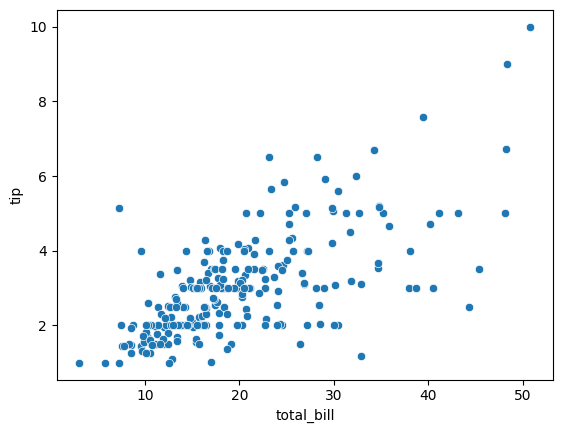

In [125]:
sns.scatterplot(x='total_bill',y='tip',data=df)

In [126]:
# split the data into X and y
X=df[['total_bill']]
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=df['tip']

In [127]:
# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [128]:
# call the model
model=LinearRegression()

In [129]:
# train the model
model.fit(X_train,y_train)

LinearRegression()

In [130]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y=',model.intercept_,'+',model.coef_,'*X')

3.0274649208787667
[0.99146515]
y= 3.0274649208787667 + [0.99146515] *X


In [131]:
X_test

array([[ 8.17642307e-01],
       [-7.16550509e-01],
       [-8.08849711e-01],
       [ 4.75459904e-01],
       [ 3.19490953e+00],
       [-2.13407304e-01],
       [-1.03059291e+00],
       [-7.19927310e-01],
       [-4.95932907e-01],
       [-4.02508106e-01],
       [ 2.01939101e-01],
       [-2.22412104e-01],
       [-1.84141704e-01],
       [ 2.29442952e+00],
       [-6.58019309e-01],
       [-1.41104572e+00],
       [ 2.70789839e-03],
       [ 1.35793031e+00],
       [ 9.72582994e-02],
       [ 6.87072706e-01],
       [ 3.83349840e-03],
       [ 3.34759902e-01],
       [-6.72652109e-01],
       [-3.33846505e-01],
       [ 5.32865504e-01],
       [-3.89393021e-02],
       [-7.16550509e-01],
       [-1.28987303e-01],
       [-3.16962505e-01],
       [-4.79048907e-01],
       [-2.80943305e-01],
       [-8.22356911e-01],
       [-7.63825710e-01],
       [ 2.05129992e+00],
       [-1.68383303e-01],
       [ 2.33720232e+00],
       [-7.90840110e-01],
       [-1.79450166e-03],
       [-1.0

In [132]:
# predict
y_pred=model.predict(X_test)

In [133]:
y_pred

array([3.83812877, 2.31703007, 2.22551862, 3.49886684, 6.19510637,
       2.81587902, 2.00566797, 2.31368209, 2.53576473, 2.62839216,
       3.2276805 , 2.80695107, 2.84489484, 5.30231182, 2.37506171,
       1.62846227, 3.03014971, 4.3738055 , 3.12389313, 3.70867356,
       3.0312657 , 3.3593677 , 2.3605538 , 2.69646775, 3.5557825 ,
       2.98885796, 2.31703007, 2.89957851, 2.71320764, 2.55250463,
       2.74891943, 2.21212671, 2.27015835, 5.0612573 , 2.86051874,
       5.34471956, 2.24337452, 3.02568574, 1.94540434, 3.86379661,
       4.14502689, 4.21198649, 4.21868244, 3.64171397, 2.27015835,
       2.7690073 , 3.5066788 , 3.08371738, 4.81797078])

In [134]:
# evaluate the model
print('MSE=',mean_squared_error(X_test,y_pred))
print('R2=',r2_score(y_test,y_pred))
print('RSME=',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE= 9.157993620595965
R2= 0.3154450187663662
RSME= 0.9273439910991212


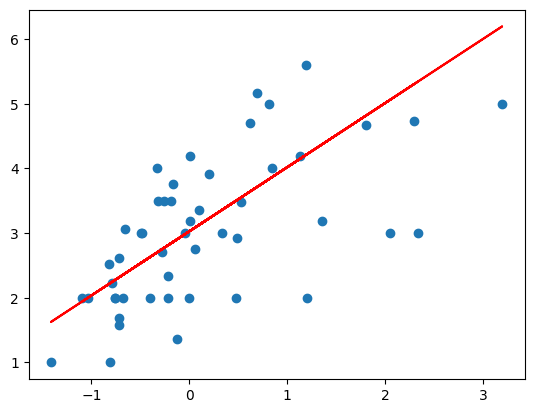

In [135]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')
plt.show()